In [1]:
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
log = pd.read_csv("JigsawGoogle.csv")

In [3]:
log.shape

(523, 3)

In [4]:
log.dtypes

User       object
Reviews    object
Ratings     int64
dtype: object

In [5]:
log.head()

,User,Reviews,Ratings
0,Rajat Bhatnagar,I enrolled myself for Product Management PG ce...,5
1,Saurabh Patil,Jigsaw is good platform to excel your career a...,4
2,Apurv sharma,It was excellent learning from learned faculty...,5
3,Abhimanyu Bhattacharjee,This course gives a great understanding of dif...,5
4,Puja Kar,Recently I have completed the PADHR course fro...,4


In [6]:
df = pd.DataFrame(log['Reviews'] , columns= ['Reviews'])
#df['Reviews'] = df['Reviews'].fillna('').apply(str)
df['Reviews'] = df['Reviews'].replace('',np.nan)
df.dropna(subset = ["Reviews"], inplace=True)

In [7]:
df

,Reviews
0,I enrolled myself for Product Management PG ce...
1,Jigsaw is good platform to excel your career a...
2,It was excellent learning from learned faculty...
3,This course gives a great understanding of dif...
4,Recently I have completed the PADHR course fro...
...,...
436,Because Amit Gupta asked me to do :-)
437,Great.
438,good
439,Awesome


In [8]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text)# Removing hyperlink
 
 return text


# Clean the tweets
df['Reviews'] = df['Reviews'].apply(cleanTxt)

# Show the cleaned tweets
df

,Reviews
0,I enrolled myself for Product Management PG ce...
1,Jigsaw is good platform to excel your career a...
2,It was excellent learning from learned faculty...
3,This course gives a great understanding of dif...
4,Recently I have completed the PADHR course fro...
...,...
436,Because Amit Gupta asked me to do :-)
437,Great.
438,good
439,Awesome


In [9]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
sentences = word_tokenize("I love to learn NLP \n 'a :(")
#for i in range(len(sentences)):
sentences = [word.lower() for word in sentences if re.match('^[a-zA-Z]+', word)]  
sentences

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prath\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['i', 'love', 'to', 'learn', 'nlp', 'a']

In [10]:
#Removing emojis from the comments
import emoji
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df['Reviews'] = df['Reviews'].apply(remove_emoji)
df

,Reviews
0,I enrolled myself for Product Management PG ce...
1,Jigsaw is good platform to excel your career a...
2,It was excellent learning from learned faculty...
3,This course gives a great understanding of dif...
4,Recently I have completed the PADHR course fro...
...,...
436,Because Amit Gupta asked me to do :-)
437,Great.
438,good
439,Awesome


In [11]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text
df['Reviews'] = df['Reviews'].apply(cleanTxt)

# Show the cleaned tweets
df

,Reviews
0,I enrolled myself for Product Management PG ce...
1,Jigsaw is good platform to excel your career a...
2,It was excellent learning from learned faculty...
3,This course gives a great understanding of dif...
4,Recently I have completed the PADHR course fro...
...,...
436,Because Amit Gupta asked me to do :-)
437,Great.
438,good
439,Awesome


In [12]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Reviews'].apply(getSubjectivity)
df['Polarity'] = df['Reviews'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Reviews,Subjectivity,Polarity
0,I enrolled myself for Product Management PG ce...,0.578571,0.428571
1,Jigsaw is good platform to excel your career a...,0.348333,0.483333
2,It was excellent learning from learned faculty...,0.775000,0.575000
3,This course gives a great understanding of dif...,0.530357,0.284722
4,Recently I have completed the PADHR course fro...,0.350000,0.180000
...,...,...,...
436,Because Amit Gupta asked me to do :-),1.000000,0.500000
437,Great.,0.750000,0.800000
438,good,0.600000,0.700000
439,Awesome,1.000000,1.000000


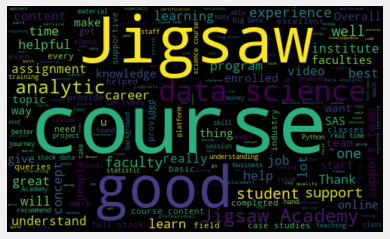

In [13]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Reviews']])
allWords = allWords.replace('\n','')
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110,stopwords=STOPWORDS).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [14]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Reviews,Subjectivity,Polarity,Analysis
0,I enrolled myself for Product Management PG ce...,0.578571,0.428571,Positive
1,Jigsaw is good platform to excel your career a...,0.348333,0.483333,Positive
2,It was excellent learning from learned faculty...,0.775000,0.575000,Positive
3,This course gives a great understanding of dif...,0.530357,0.284722,Positive
4,Recently I have completed the PADHR course fro...,0.350000,0.180000,Positive
...,...,...,...,...
436,Because Amit Gupta asked me to do :-),1.000000,0.500000,Positive
437,Great.,0.750000,0.800000,Positive
438,good,0.600000,0.700000,Positive
439,Awesome,1.000000,1.000000,Positive


In [15]:
print('Printing positive Content:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Reviews'][i])
    print()
    j= j+1

Printing positive Content:

1) I enrolled myself for Product Management PG certification and I must say that my learning has been nothing short of great. The curriculum has been one of a kind which enables working professionals to scale up and develop the skills required to go a notch above. This experience has been truly world class. I recommend this curriculum to all who are looking to learn the mantra of becoming a problem solver. The student support has been impeccable and available whenever needed.

2) Jigsaw is good platform to excel your career and to learn all the trending courses. Till date my experience is good and looking forward to take more insights from Industry experts provided by Jigsaw. Academic content is up to date as per the ongoing industry standard. All the faculty members are approachable at any given point of time.
So all the very best to the Learners out there and keep adding up your skills through Jigsaw!!

3) It was excellent learning from learned faculty.
Al

In [16]:
# Printing negative comment  
print('Printing negative Content:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Reviews'][i])
    print()
    j=j+1

Printing negative Content:

1) These people are totally fake and all the comments here are wrong these people promises to give placements but after cource completion these people never going to contact you and at the time of certificate these acadamy wants you to give positive feedback thats why these review are always positive dont do cources from jigsaw academy.

2) One of the worst online education service provider. I was ensured on-time faculty support when I bought the course (HR analytics). No one responds to your query and their customer support only responds if they have a potential new customer. Money minded and unprofessional.
DONT WASTE YOUR HARD EARNED MONEY HERE!!

3) WORST PLACEMENT ASSISTANCE AND CAREER. DON'T TRUST THE WORDS WHAT THEY SAY WHILE TAKING ADMISSION.

4) I had enrolled for pyspark with ML course. The course costed around 20K INR, on purchase i observed that the course hardly had any content on ML with just 4 basic videos on basics of ML. I had contacted the 

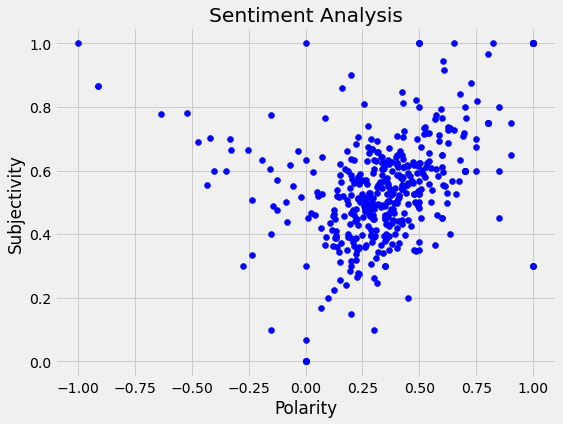

In [17]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [18]:
# Print the percentage of positive comments
pcomments = df[df.Analysis == 'Positive']
pcomments = pcomments['Reviews']
pcomments

round( (pcomments.shape[0] / df.shape[0]) * 100 , 1)

91.2

In [19]:
# Print the percentage of negative comments
pcomments = df[df.Analysis == 'Negative']
pcomments = pcomments['Reviews']
pcomments

round( (pcomments.shape[0] / df.shape[0]) * 100 , 1)

6.8

In [20]:
# Show the value counts
df['Analysis'].value_counts()

Positive    402
Negative     30
Neutral       9
Name: Analysis, dtype: int64

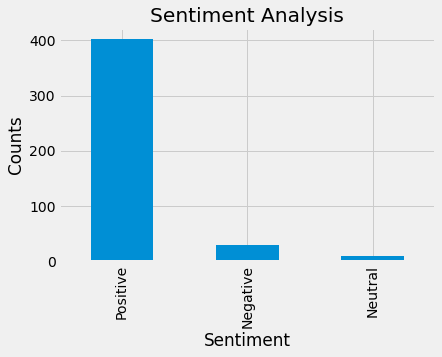

In [21]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

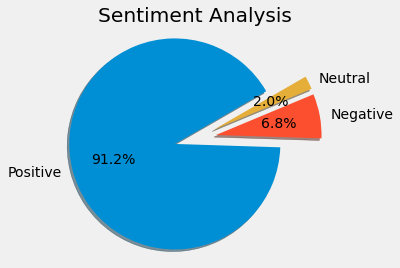

In [22]:
plt.style.use("fivethirtyeight")
labels = ['Positive', 'Negative', 'Neutral']
explode = [0.2, 0.2, 0.2]

plt.pie(df['Analysis'].value_counts(), autopct='%1.1f%%',labels=labels, explode=explode, startangle=30, shadow = True)
plt.title("Sentiment Analysis")
plt.axis('equal')
plt.show()

In [23]:
df1=pd.concat([df,log['Ratings']],axis=1)

In [24]:
df1.dropna(inplace=True)

In [25]:
df1

,Reviews,Subjectivity,Polarity,Analysis,Ratings
0,I enrolled myself for Product Management PG ce...,0.578571,0.428571,Positive,5
1,Jigsaw is good platform to excel your career a...,0.348333,0.483333,Positive,4
2,It was excellent learning from learned faculty...,0.775000,0.575000,Positive,5
3,This course gives a great understanding of dif...,0.530357,0.284722,Positive,5
4,Recently I have completed the PADHR course fro...,0.350000,0.180000,Positive,4
...,...,...,...,...,...
436,Because Amit Gupta asked me to do :-),1.000000,0.500000,Positive,5
437,Great.,0.750000,0.800000,Positive,5
438,good,0.600000,0.700000,Positive,5
439,Awesome,1.000000,1.000000,Positive,5


In [26]:
df1['Ratings'].describe(include=all)

count    441.000000
mean       4.231293
std        1.232522
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: Ratings, dtype: float64

In [27]:
df1['Ratings'].value_counts()

5    256
4    126
1     46
3     10
2      3
Name: Ratings, dtype: int64

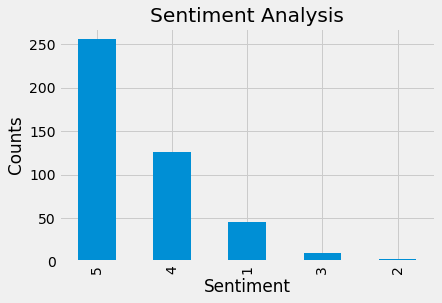

In [28]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df1['Ratings'].value_counts().plot(kind = 'bar')
plt.show()

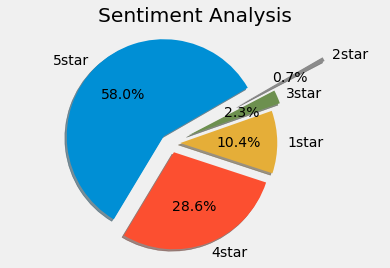

In [29]:
plt.style.use("fivethirtyeight")
labels = ['5star', '4star', '1star', '3star', '2star']
explode = [0.1, 0.1, 0.1, 0.2, 0.8]

plt.pie(df1['Ratings'].value_counts(), autopct='%1.1f%%',labels=labels, explode=explode, startangle=30, shadow = True)
plt.title("Sentiment Analysis")
plt.axis('equal')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


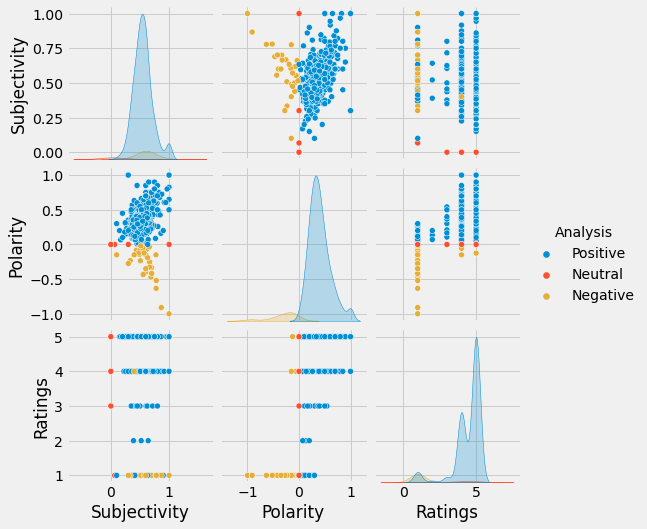

In [30]:
sns.pairplot(df1,diag_kind='kde',hue='Analysis')

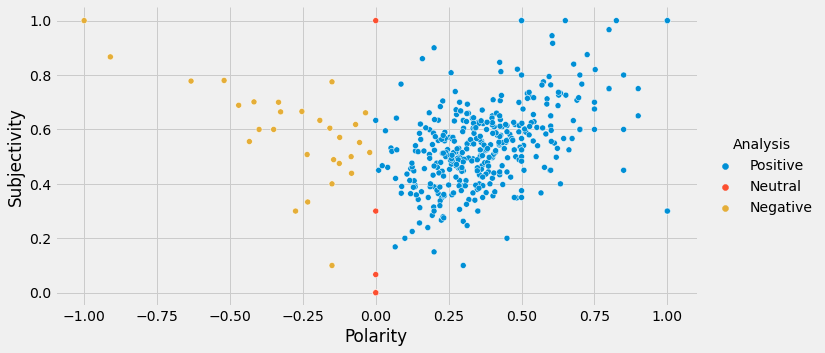

In [31]:
sns.pairplot(df1,diag_kind='kde',hue='Analysis', x_vars='Polarity',y_vars='Subjectivity',aspect=2,height=5)

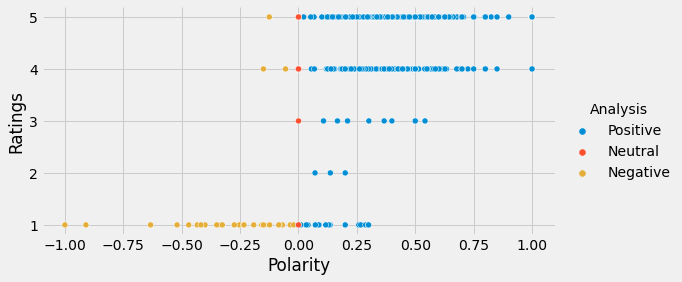

In [32]:
 sns.pairplot(df1,diag_kind='kde',hue='Analysis', x_vars='Polarity',y_vars='Ratings',aspect=2,height=4)

In [33]:
df1.to_excel("Final.xlsx") 